# Import packages.

In [1]:
import pyaudio
import numpy as np
from matplotlib import pyplot as plt
import time
from pprint import pprint

# Read audio for 5 seconds and store in a list called frames.

In [13]:
CHUNKSIZE = 1024 # fixed chunk size
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 5

# initialize portaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16, 
                channels=CHANNELS, 
                rate=RATE, 
                input=True, 
                frames_per_buffer=CHUNKSIZE)

# np.set_printoptions(threshold=np.nan)
frames = []
for i in range(0, int(RATE / CHUNKSIZE * RECORD_SECONDS)):
    data = stream.read(CHUNKSIZE)
    # pprint(np.fromstring(data, dtype=np.int16))
    frames.append(np.divide(np.fromstring(data, dtype=np.int16), 1024.0))
    
# close stream
stream.stop_stream()
stream.close()
p.terminate()

# First try...

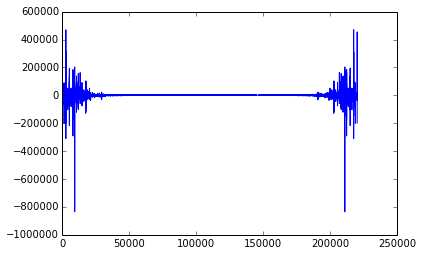

In [18]:
#stacks sequence of arrays horizontally
numpydata = np.hstack(frames)

#find fourier coefficients
numpydata = np.fft.fft(numpydata)

#plot things
plt.plot(numpydata)
plt.show()

# close stream
stream.stop_stream()
stream.close()
p.terminate()

# Using fft.fftfreq (shape)

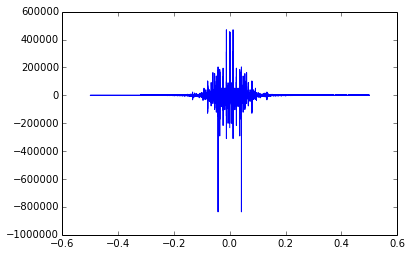

In [19]:
#stacks sequence of arrays horizontally
numpydata = np.hstack(frames)

#find fourier coefficients
numpydata = np.fft.fft(numpydata)

#find frequencies of coefficients
freq = np.fft.fftfreq(numpydata.shape[-1])

#plot things
plt.plot(freq,numpydata)
plt.show()

# close stream
stream.stop_stream()
stream.close()
p.terminate()

# Using fft.fftfreq (len(numpydata))

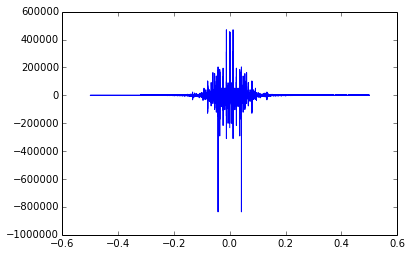

In [20]:
#stacks sequence of arrays horizontally
numpydata = np.hstack(frames)

#find fourier coefficients
numpydata = np.fft.fft(numpydata)

#find frequencies of coefficients
freq = np.fft.fftfreq(len(numpydata))

#plot things
plt.plot(freq,numpydata)
plt.show()

# close stream
stream.stop_stream()
stream.close()
p.terminate()

No apparent difference between using len(numpydata) and numpydata.shape[-1]

# Trying manually separating frequency and power

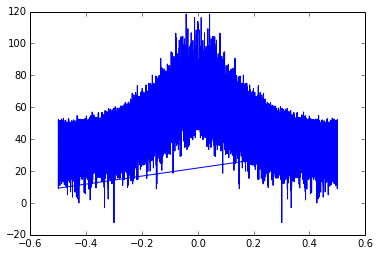

In [25]:
#stacks sequence of arrays horizontally
numpydata = np.hstack(frames)

X = np.fft.fft(numpydata)
Xdb = 20*np.log10(np.absolute(X))
freq = np.fft.fftfreq(X.shape[-1])

# plot data
plt.plot(freq, Xdb)
plt.show()

# close stream
stream.stop_stream()
stream.close()
p.terminate()

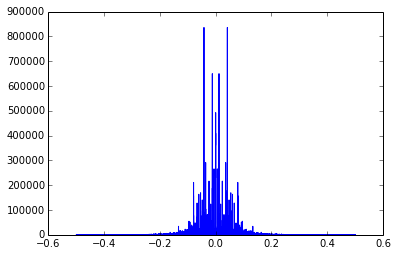

In [35]:
#stacks sequence of arrays horizontally
numpydata = np.hstack(frames)

X = np.fft.fft(numpydata)
power = np.absolute(X)
freq = np.fft.fftfreq(numpydata.size)

# plot data
plt.plot(freq, power)
plt.show()

# close stream
stream.stop_stream()
stream.close()
p.terminate()

# THIS FRIKING WORKS

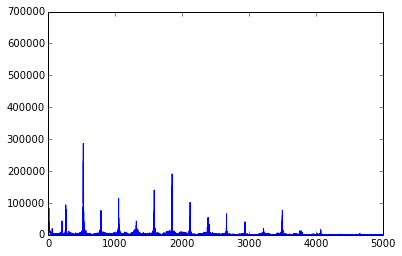

In [14]:
numpydata = np.hstack(frames)

n = numpydata.size

spectrum = np.fft.fft(numpydata)
freq = np.fft.fftfreq(n, 1./RATE)

# plot data
# x axis is frequency (hz)
# y axis is power... in some unit

# plt.figure()
plt.plot(freq,np.absolute(spectrum))
plt.xlim((0, 5000))
plt.show()

In [25]:
def read_audio(seconds):
    CHUNKSIZE = 1024 # fixed chunk size
    FORMAT = pyaudio.paInt16
    CHANNELS = 1
    RATE = 44100
    RECORD_SECONDS = seconds

    # initialize portaudio
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paInt16, 
                    channels=CHANNELS, 
                    rate=RATE, 
                    input=True, 
                    frames_per_buffer=CHUNKSIZE)

    # np.set_printoptions(threshold=np.nan)
    frames = []
    for i in range(0, int(RATE / CHUNKSIZE * RECORD_SECONDS)):
        data = stream.read(CHUNKSIZE)
        # pprint(np.fromstring(data, dtype=np.int16))
        frames.append(np.divide(np.fromstring(data, dtype=np.int16), 1024.0))

    # close stream
    stream.stop_stream()
    stream.close()
    p.terminate()
    
    return frames

def spectrum_plot():

    RATE = 44100
    
    plt.ion()
    plt.show()
    
    for i in range(1000):
        
        plt.clf()
        plt.ylim((0,200))
        plt.xlim((0, 10000))
        
        numpydata = np.hstack(read_audio(0.03))

        n = numpydata.size

        spectrum = np.fft.fft(numpydata)
        freq = np.fft.fftfreq(n, 1./RATE)

        # plot data
        # x axis is frequency (hz)
        # y axis is power... in some unit

        # plt.figure()
        plt.plot(freq, 20*np.log10(np.absolute(spectrum)))
        plt.draw()
        i += 1
        time.sleep(0.05)
    
    plt.close()

spectrum_plot()

In [24]:
plt.close()